In [2]:
%matplotlib inline


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear and Logistic Regression Lab

## Demo

In [32]:
housing_data = pd.read_fwf("https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data", header = None)

In [66]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,506.0,1.716290,2.653510,0.00632,0.0819,0.250895,2.326717,9.96654
1,506.0,11.363636,23.322453,0.00000,0.0000,0.000000,12.500000,100.00000
2,506.0,11.136779,6.860353,0.46000,5.1900,9.690000,18.100000,27.74000
3,506.0,0.069170,0.253994,0.00000,0.0000,0.000000,0.000000,1.00000
4,506.0,0.554695,0.115878,0.38500,0.4490,0.538000,0.624000,0.87100
5,506.0,6.284634,0.702617,3.56100,5.8855,6.208500,6.623500,8.78000
6,506.0,68.574901,28.148861,2.90000,45.0250,77.500000,94.075000,100.00000
7,506.0,3.696228,1.999689,0.58570,2.0737,3.107300,5.112625,9.22290
8,506.0,4.332016,1.417166,1.00000,4.0000,4.000000,5.000000,8.00000
9,506.0,408.237154,168.537116,187.00000,279.0000,330.000000,666.000000,711.00000


In [34]:
attributes= housing_data.drop(columns=[13])

In [68]:
# Scaling the data - sets minimum to 0 and maximum to 1
scaler = MinMaxScaler()

In [69]:
scaler.fit(attributes)

MinMaxScaler()

In [73]:
scaler.data_max_

array([  9.96654, 100.     ,  27.74   ,   1.     ,   0.871  ,   8.78   ,
       100.     ,   9.2229 ,   8.     , 711.     ,  22.     , 396.9    ,
        37.97   ])

In [74]:
scaler.data_min_

array([6.320e-03, 0.000e+00, 4.600e-01, 0.000e+00, 3.850e-01, 3.561e+00,
       2.900e+00, 5.857e-01, 1.000e+00, 1.870e+02, 1.260e+01, 3.200e-01,
       1.730e+00])

In [75]:
scaler.data_range_

array([9.96022e+00, 1.00000e+02, 2.72800e+01, 1.00000e+00, 4.86000e-01,
       5.21900e+00, 9.71000e+01, 8.63720e+00, 7.00000e+00, 5.24000e+02,
       9.40000e+00, 3.96580e+02, 3.62400e+01])

In [79]:
#Transform
attributes = scaler.transform(attributes)

In [35]:
target = housing_data[13]

In [36]:
linear_regression = LinearRegression()

In [37]:
linear_regression.fit(attributes, target)

LinearRegression()

In [38]:
linear_regression.score(attributes, target)

0.7198065414937174

In [41]:
predictions = linear_regression.predict(attributes)

In [42]:
mean_squared_error(target, predictions)

23.653807404961373

In [47]:
# The mean squared error serves this purpose
((predictions - target) ** 2).sum() / len(target)

23.653807404961373

In [48]:
np.sqrt(mean_squared_error(target, predictions))

4.86351800705635

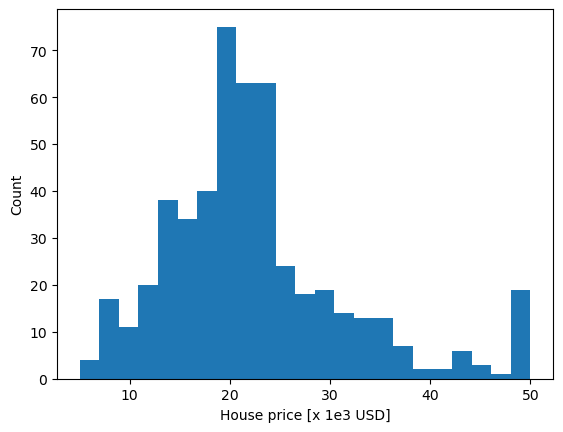

In [80]:
plt.hist(target, bins = 'fd')
plt.xlabel('House price [x 1e3 USD]')
plt.ylabel('Count')
plt.show()

In [81]:
target.mean()

22.532806324110698

In [82]:
target.skew()

1.1080984082549072

In [83]:
(np.abs(target - predictions) / target).mean() * 100

17.157373124869437

In [84]:
target_lt_10k = target[target <= 10]

In [85]:
attributes_lt_10k = housing_data.loc[target_lt_10k.index].drop(columns = 13)

In [86]:
predictions_lt_10k = linear_regression.predict(attributes_lt_10k)

In [87]:
(np.abs(target_lt_10k - predictions_lt_10k) / target_lt_10k).mean() *100

59.87873831261289

In [88]:
linear_regression.coef_ 

array([ 2.09281375e-01,  1.49403979e-02,  1.27164577e-02,  3.00565375e+00,
       -1.55234852e+01,  4.29955958e+00,  2.84848139e-03, -1.08366345e+00,
        1.93258621e-01, -2.42034372e-03, -9.65535221e-01,  9.43510233e-03,
       -5.25242783e-01])

In [89]:
linear_regression.intercept_

28.305110750099168